In [44]:
import tensorflow as tf

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [47]:
from PIL import Image

In [48]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=url, extract=True)

In [49]:
path_to_zip

'/home/vasylcf/.keras/datasets/cats_and_dogs.zip'

In [50]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [51]:
PATH

'/home/vasylcf/.keras/datasets/cats_and_dogs_filtered'

In [52]:
ls $PATH

train/  validation/  vectorize.py


In [55]:
train_dir = os.path.join(PATH,'train')
validation_dir = os.path.join(PATH,'validation')

In [56]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [58]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [59]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [60]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [61]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [62]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, directory=train_dir,
                                                           shuffle=True,target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           class_mode='binary' )

Found 2000 images belonging to 2 classes.


In [64]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size, directory=validation_dir,
                                                             shuffle=True, target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                             class_mode='binary')

Found 1000 images belonging to 2 classes.


In [65]:
samples,_ = next(train_data_gen) 

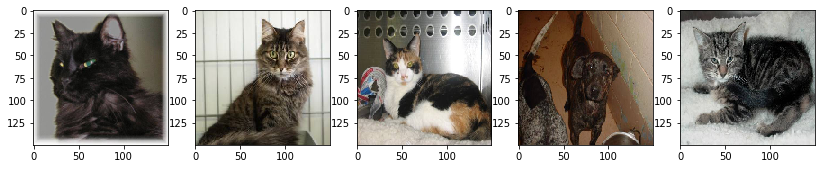

In [70]:
plt.figure(figsize=(14,5))
for n,im in enumerate(samples[:5]):
    plt.subplot(1,5,n+1)
    plt.imshow(im)

In [73]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', input_shape=[IMG_HEIGHT,IMG_WIDTH,3],activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=32, kernel_size=3, padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=3, activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1, activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [74]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [79]:
history = model.fit_generator(train_data_gen, steps_per_epoch=total_train//batch_size,
                              epochs=epochs,
                              validation_data=val_data_gen,
                              validation_steps=total_val//batch_size)

Epoch 1/15
15/15 [==============================] - 20s 1s/step - loss: 0.9494 - acc: 0.5134 - val_loss: 0.6912 - val_acc: 0.5759
Epoch 2/15
15/15 [==============================] - 18s 1s/step - loss: 0.6845 - acc: 0.5507 - val_loss: 0.6739 - val_acc: 0.5737
Epoch 3/15
15/15 [==============================] - 18s 1s/step - loss: 0.6549 - acc: 0.6207 - val_loss: 0.6652 - val_acc: 0.5859
Epoch 4/15
15/15 [==============================] - 17s 1s/step - loss: 0.5864 - acc: 0.6885 - val_loss: 0.6104 - val_acc: 0.6775
Epoch 5/15
15/15 [==============================] - 17s 1s/step - loss: 0.5746 - acc: 0.7078 - val_loss: 0.6255 - val_acc: 0.6853
Epoch 6/15
15/15 [==============================] - 17s 1s/step - loss: 0.5208 - acc: 0.7458 - val_loss: 0.6942 - val_acc: 0.6551
Epoch 7/15
15/15 [==============================] - 17s 1s/step - loss: 0.4780 - acc: 0.7714 - val_loss: 0.5990 - val_acc: 0.6942
Epoch 8/15
15/15 [==============================] - 17s 1s/step - loss: 0.4085 - acc: 0.81

In [85]:
#Visualize training result
acc_train = history.history['acc']
loss_train = history.history['loss']

acc_val = history.history['val_acc']
loss_val = history.history['val_loss']

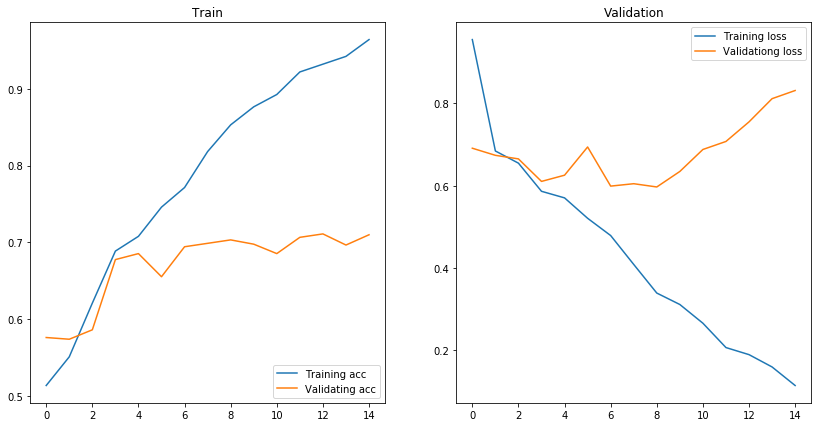

In [97]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title('Train')
plt.plot(range(epochs),acc_train, label='Training acc')
plt.plot(range(epochs),acc_val, label='Validating acc')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.title('Validation')
plt.plot(range(epochs),loss_train, label='Training loss')
plt.plot(range(epochs),loss_val, label='Validationg loss')
plt.legend(loc='upper right')
plt.show()

In [98]:
img_generator_train = ImageDataGenerator(rescale=1./255,
                                         horizontal_flip=True,
                                         rotation_range=45,
                                         zoom_range=0.5,
                                         width_shift_range=0.15,
                                         height_shift_range=0.15)

In [99]:
img_data_gen = img_generator_train.flow_from_directory(directory=train_dir,
                                                       target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                       batch_size=batch_size,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.


In [100]:
samples,_ = next(img_data_gen)

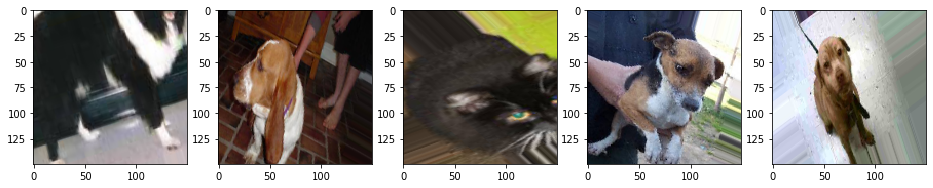

In [103]:
plt.figure(figsize=(16,6))
for n,i in enumerate(samples[:5]):
    plt.subplot(1,5,n+1)
    plt.imshow(i)

In [105]:
img_gen_val = ImageDataGenerator(rescale=1./255)

In [106]:
img_data_val = img_gen_val.flow_from_directory(directory=validation_dir, 
                                               batch_size=batch_size, 
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='binary')

Found 1000 images belonging to 2 classes.


In [107]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [108]:
model_new.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [109]:
history = model_new.fit_generator(img_data_gen, 
                                  steps_per_epoch=total_train//batch_size, 
                                  epochs=epochs,validation_data=img_data_val,
                                  validation_steps=total_val//batch_size )

Epoch 1/15
15/15 [==============================] - 21s 1s/step - loss: 0.8735 - acc: 0.5016 - val_loss: 0.6926 - val_acc: 0.4911
Epoch 2/15
15/15 [==============================] - 20s 1s/step - loss: 0.6929 - acc: 0.5192 - val_loss: 0.6928 - val_acc: 0.5201
Epoch 3/15
15/15 [==============================] - 21s 1s/step - loss: 0.6913 - acc: 0.5443 - val_loss: 0.7022 - val_acc: 0.5089
Epoch 4/15
15/15 [==============================] - 20s 1s/step - loss: 0.6876 - acc: 0.5625 - val_loss: 0.6778 - val_acc: 0.5915
Epoch 5/15
15/15 [==============================] - 20s 1s/step - loss: 0.6797 - acc: 0.5684 - val_loss: 0.6491 - val_acc: 0.5993
Epoch 6/15
15/15 [==============================] - 20s 1s/step - loss: 0.6600 - acc: 0.5962 - val_loss: 0.6316 - val_acc: 0.6551
Epoch 7/15
15/15 [==============================] - 20s 1s/step - loss: 0.6566 - acc: 0.5876 - val_loss: 0.6263 - val_acc: 0.6451
Epoch 8/15
15/15 [==============================] - 20s 1s/step - loss: 0.6463 - acc: 0.61

In [110]:
#Visualize training result
acc_train = history.history['acc']
loss_train = history.history['loss']

acc_val = history.history['val_acc']
loss_val = history.history['val_loss']

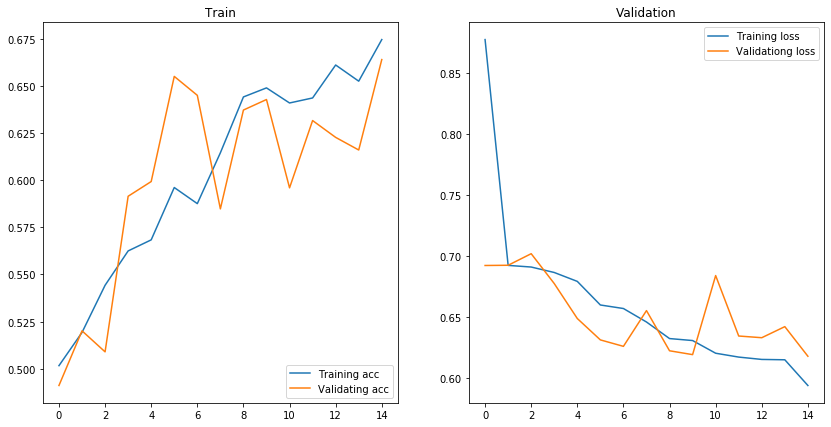

In [111]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title('Train')
plt.plot(range(epochs),acc_train, label='Training acc')
plt.plot(range(epochs),acc_val, label='Validating acc')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.title('Validation')
plt.plot(range(epochs),loss_train, label='Training loss')
plt.plot(range(epochs),loss_val, label='Validationg loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#https://www.tensorflow.org/tutorials/images/classification?authuser=1